<a href="https://colab.research.google.com/github/Rakesh-kumar-s/Rakesh-kumar-s/blob/main/New_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()


Saving weatherHistory.csv to weatherHistory.csv


In [7]:

data = pd.read_csv("weatherHistory.csv")
print(data.head())


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [35]:
print(data.isnull().sum())



Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Date                          0
Year                          0
Day                           0
Hour                          0
Month                         0
dtype: int64


In [38]:

numeric_data = data.select_dtypes(include=[np.number])
numeric_means = numeric_data.mean()

data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_means)

In [40]:

avg_temp = data.groupby('Month')['Temperature (C)'].mean()
print(avg_temp)



Month
1      0.815678
2      2.166880
3      6.914976
4     12.769200
5     16.874455
6     20.728510
7     22.965462
8     22.339134
9     17.503458
10    11.334119
11     6.587549
12     1.625086
Name: Temperature (C), dtype: float64


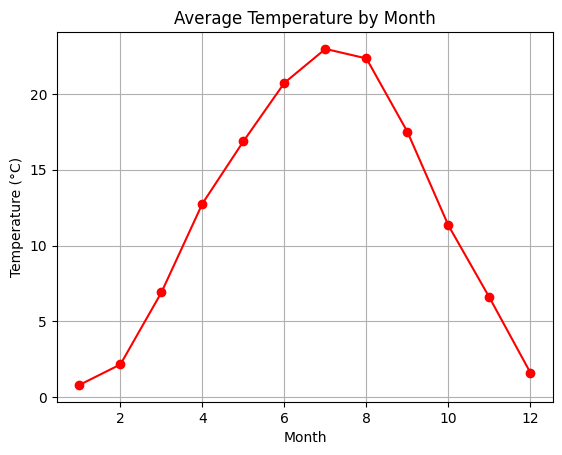

In [41]:
plt.plot(avg_temp.index, avg_temp.values, marker='o', color='r')
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()


In [45]:
total_rainfall = data.groupby('Month')['Precip Type'].sum() # Replace 'Rainfall' with the correct column name from your dataset, likely 'Precip Type'
plt.bar(total_rainfall.index, total_rainfall.values, color='skyblue')
plt.title("Total Rainfall by Month")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

In [46]:
hottest_day = data[data['Temperature (C)'] == data['Temperature (C)'].max()]
coldest_day = data[data['Temperature (C)'] == data['Temperature (C)'].min()]

print("Hottest Day:\n", hottest_day)
print("Coldest Day:\n", coldest_day)

Hottest Day:
                   Formatted Date Summary Precip Type  Temperature (C)  \
12759  2007-07-22 15:00:00+02:00   Clear        rain        39.905556   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
12759                 37.538889      0.13            23.5865   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
12759                   250.0            9.982         0.0   

       Pressure (millibars)                             Daily Summary  \
12759               1007.55  Partly cloudy starting in the afternoon.   

                           Date  Year  Day  Hour  Month  
12759 2007-07-22 13:00:00+00:00  2007   22    13      7  
Coldest Day:
                   Formatted Date Summary Precip Type  Temperature (C)  \
54847  2012-02-10 07:00:00+01:00   Foggy        snow       -21.822222   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
54847                -21.822222       0.8             3.0751   

       Wind Bearing (degrees)  V

In [47]:
data.to_csv("cleaned_weather_data.csv", index=False)
files.download("cleaned_weather_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>